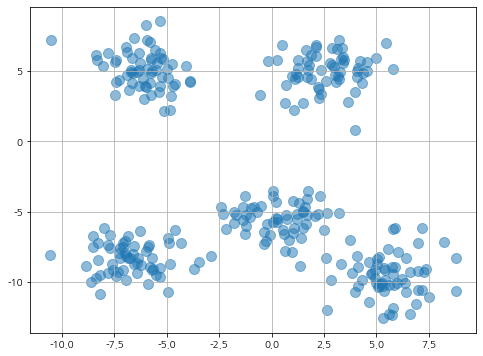

n_cluster = 2, 실루엣 스코어 = 0.560
n_cluster = 3, 실루엣 스코어 = 0.574
n_cluster = 4, 실루엣 스코어 = 0.639
n_cluster = 5, 실루엣 스코어 = 0.683
n_cluster = 6, 실루엣 스코어 = 0.610
n_cluster = 7, 실루엣 스코어 = 0.529
n_cluster = 8, 실루엣 스코어 = 0.474
n_cluster = 9, 실루엣 스코어 = 0.404


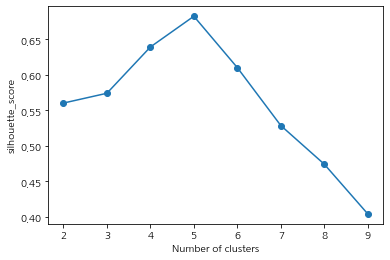

In [1]:
# K-Means Clustering : Silrouette 계수 확인
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# 시험용 데이터 세트를 구성한다
X, y = make_blobs(n_samples=300, n_features=2, centers=5, cluster_std=1.4, shuffle=True, random_state=10)

# 시험용 데이터를 2차원 좌표에 표시한다
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], marker='o', s=100, alpha=0.5)
plt.grid()
plt.show()

silhouette_list = []
for n in range(2, 10):
    # K-means 알고리즘으로 시험용 데이터를 3 그룹으로 분류한다 (k = 3)
    km = KMeans(n_clusters=n, init='random', n_init=100, max_iter=300, tol=1e-04, random_state=0)
    km = km.fit(X)
    y_km = km.predict(X)

    vals = silhouette_samples(X, y_km, metric='euclidean')
    mean_vals = silhouette_score(X, y_km, metric='euclidean')     # np.mean(vals)
    silhouette_list.append(mean_vals)
    print('n_cluster = {}, 실루엣 스코어 = {:.3f}'.format(n, mean_vals))

plt.plot(range(2, 10), silhouette_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()


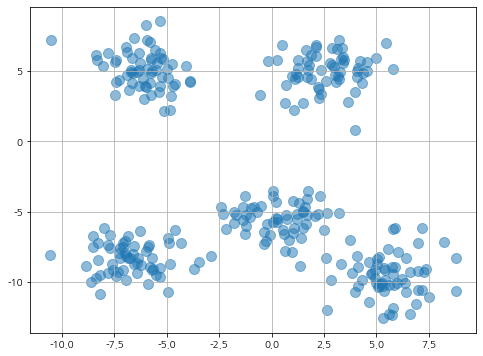

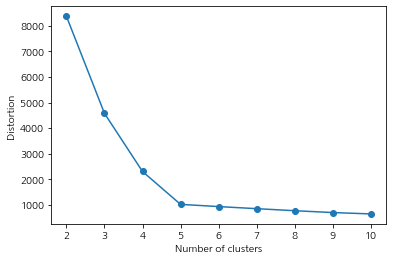

In [2]:
# K-Means Clustering : Elbow에 의한 최적 cluster 개수
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 시험용 데이터 세트를 구성한다
X, y = make_blobs(n_samples=300, n_features=2, centers=5, cluster_std=1.4, shuffle=True, random_state=10)

# 시험용 데이터를 2차원 좌표에 표시한다
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], marker='o', s=100, alpha=0.5)
plt.grid()
plt.show()

# 엘보우 (elbow) 방법으로 최적 cluster 개수를 찾아본다.
distortions = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, init='random', n_init=100, max_iter=300,tol=1e-04)
    km = km.fit(X)
    
    # Cluster내의 SSE를 계산한다.
    # 관성 (inertia), 혹은 왜곡 (distortion)이라고도 한다.
    distortions.append(km.inertia_)
    
plt.plot(range(2, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

[[ 2.60509732  1.22529553]
 [ 0.5323772   3.31338909]
 [ 0.802314    4.38196181]
 [ 0.5285368   4.49723858]
 [ 2.61858548  0.35769791]
 [ 1.59141542  4.90497725]
 [ 1.74265969  5.03846671]
 [ 2.37533328  0.08918564]
 [-2.12133364  2.66447408]
 [ 1.72039618  5.25173192]]


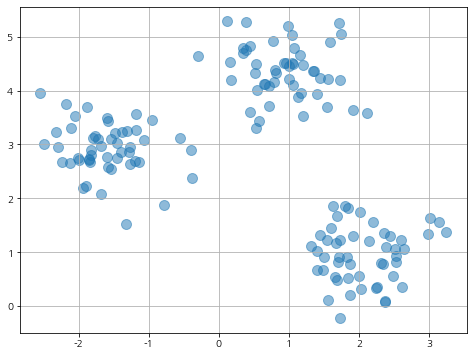

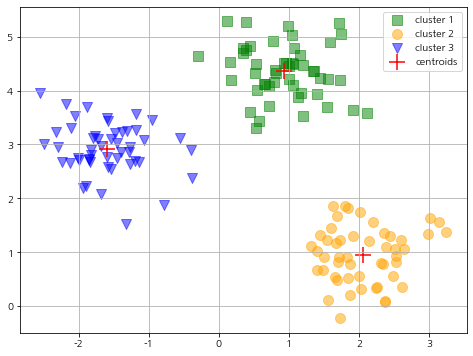

In [3]:
#1.K_Means(blobs).ipynb

# K-Means Clustering 연습
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 시험용 데이터 세트를 구성한다
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

print(X[:10, :])

# 시험용 데이터를 2차원 좌표에 표시한다
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], marker='o', s=100, alpha=0.5)
plt.grid()
plt.show()

# K-means 알고리즘으로 시험용 데이터를 3 그룹으로 분류한다 (k = 3)
# n_init = 10 (default) : Local min에 빠지는 것을 완화함.
# 초기 중심을 다르게 설정하여 (10 번) error가 작은 값을 최종 학습 결과로 선택한다.
km = KMeans(n_clusters=3, init='random', n_init=100, max_iter=300, tol=1e-04, random_state=0)
km = km.fit(X)
y_km = km.predict(X)

# 분류 결과를 표시한다
plt.figure(figsize=(8, 6))
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=100, c='green', marker='s', alpha=0.5, label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=100, c='orange', marker='o', alpha=0.5, label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=100, c='blue', marker='v', alpha=0.5, label='cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker='+', c='red', label='centroids')
plt.legend()
plt.grid()
plt.show()
